# Project 4: Personal loan campaign modelling

**Objective**

To predict whether a liability customer will buy a personal loan or not.

Which variables are most significant.

Which segment of customers should be targeted more.

 

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Bank?

__Importing the Necessary Packages:__

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

**Importing Data**

In [169]:
#Importing Data
loanInfo= pd.read_csv("Loan_Modelling.csv")

#copying Data to prevent unwanted data Changes
df=loanInfo.copy()
print(f'This data set contains {df.shape[0]} rows and {df.shape[1]} columns.')

This data set contains 5000 rows and 14 columns.


**Viewing 5 Random Data in Data set**

In [170]:
#Printing 5 random data
np.random.seed(1)
df.sample(n=5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0

**Droping ID Column**

In [129]:
df.drop(['ID'], axis=1,inplace=True)

In [130]:
print(f'This data set now contains {df.shape[0]} rows and {df.shape[1]} columns.')

This data set now contains 5000 rows and 13 columns.


**Checking for Duplicate Data**

In [131]:
# Checking for Duplicate values
if len (df[df.duplicated()])>0:
    print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("\nThere are no duplicate entries.")


There are no duplicate entries.


**Checking for Data Types in Data set**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


**Observation**
* We see that the Data now contains 13 columns and 5000 rows.
* We need to change Income, Experience, Mortgage to type float to allow a more efficient processing

**Changing Data Types to Float**

In [133]:
# Setting identifier "Income" as Float
df['Income'] = df['Income'].astype('float')
# Setting identifier "Experience" as Float
df['Experience'] = df['Experience'].astype('float')
# Setting identifier "Mortgage" as Float
df['Mortgage'] = df['Mortgage'].astype('float')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   float64
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   float64
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 507.9 KB


**Checking For Missing Data**

In [135]:
#Checking for missing Data
pd.DataFrame( df.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

Total Missing Values
Age                                    0
Experience                             0
Income                                 0
ZIPCode                                0
Family                                 0
CCAvg                                  0
Education                              0
Mortgage                               0
Personal_Loan                          0
Securities_Account                     0
CD_Account                             0
Online                                 0
CreditCard                             0

**Oberservation**

* There are no missing data in this data set

In [137]:
df = df.fillna(0) #Filling in Missing values (NaN)

**Statistical Summary**

In [138]:
df.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

**Observations**
* All the numerical variables seem to be right-skewed.
* We also see that some people have 0 for CCAvg, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online and credit Card

**EDA**

**Univariate Analysis**

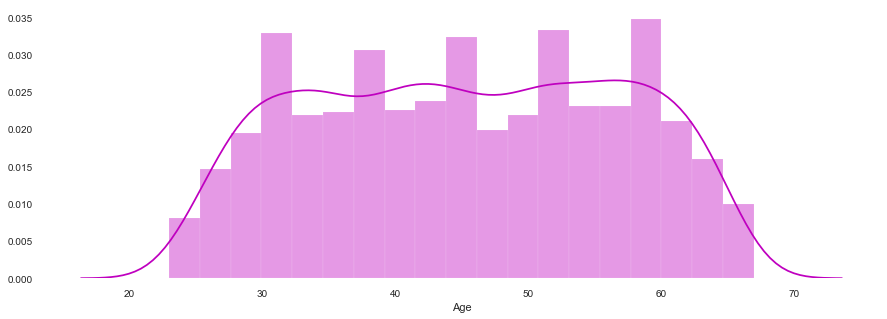

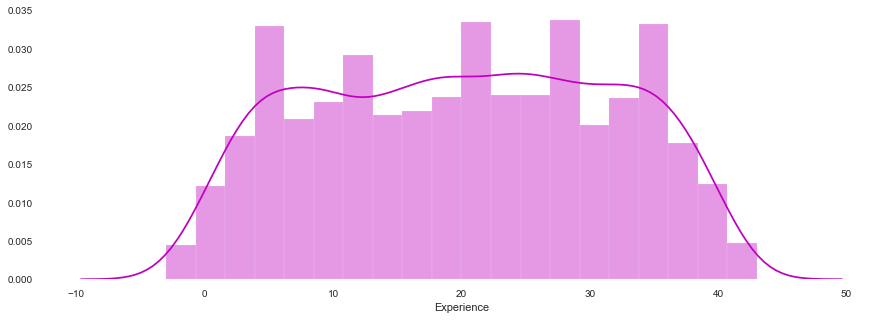

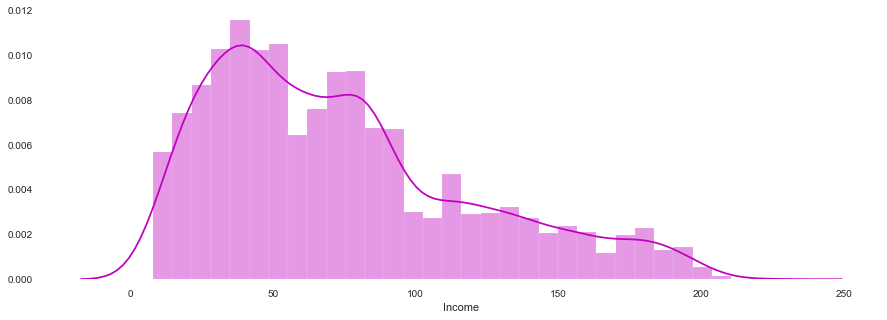

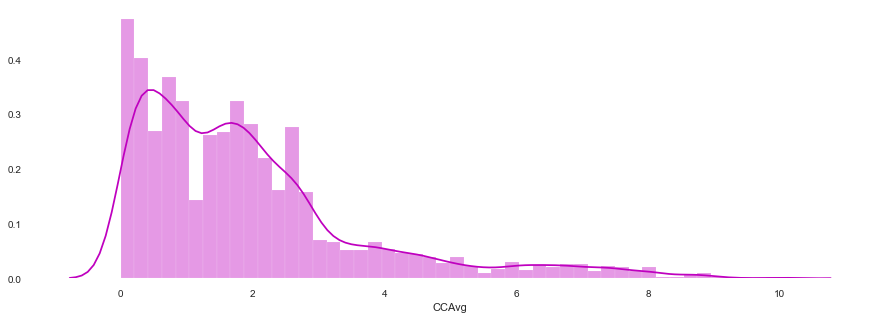

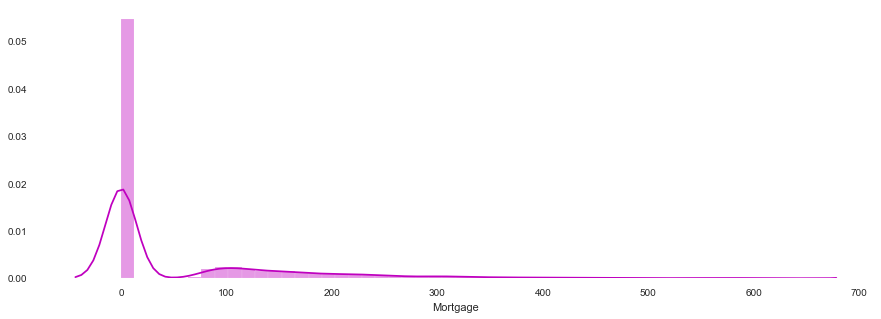

In [139]:
cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in cols: 
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 5)
  sns.distplot(df[col], color="m")

**Obersation**

* The Graphs above shows the density for each variables
* For Age, we see that most people are between 23 and 67 years
* For Experience, we see that most people have between -3 and 43. Negative experience is odd so this is something   we will need to check
* For Income, we also notice that most people make between 0 and 100 (Thousand)
* For CCAvg, we see that majority of people have between 0 and 4
* For Mortgage, we notice that majority of people do not have a mortgage. Mortgage  = 0

**Removing Outliers on Income**

In [174]:
#Checking for Outliers on Income
from scipy import stats
z=np.abs(stats.zscore(df.Income))
print(z)

[0.53822878 0.8641094  1.36379301 ... 1.08136314 0.53822878 0.20043396]


In [175]:
#Checking Z score for each table and anything about 3 will be classified as an outlier.
threshold=3
print(np.where(z>3))

(array([3896, 4993]),)


In [176]:
df1=df[(z< 3)]
print(df1)

        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0         

**Removing Outliers on CCAvg**

In [178]:
#Checking for Outliers on CCAvg
from scipy import stats
z=np.abs(stats.zscore(df.CCAvg))
print(z)

[0.19338544 0.25061056 0.53673618 ... 0.93731205 0.8228618  0.65118643]


In [179]:
#Checking Z score for each table and anything about 3 will be classified as an outlier.
threshold=3
print(np.where(z>3))

(array([   9,   18,   55,  131,  145,  150,  172,  174,  213,  227,  243,
        302,  311,  361,  423,  462,  494,  544,  554,  597,  614,  641,
        703,  704,  740,  783,  785,  787,  807,  881,  915,  917,  952,
       1008, 1149, 1163, 1190, 1220, 1277, 1304, 1339, 1354, 1431, 1498,
       1520, 1629, 1696, 1752, 1765, 1797, 1824, 1830, 1884, 1890, 2038,
       2041, 2046, 2076, 2077, 2101, 2149, 2191, 2337, 2338, 2382, 2394,
       2447, 2455, 2468, 2538, 2590, 2593, 2609, 2648, 2698, 2721, 2769,
       2773, 2791, 2812, 2841, 2852, 2857, 2858, 2952, 2988, 3184, 3203,
       3312, 3335, 3373, 3384, 3427, 3446, 3639, 3688, 3804, 3807, 3822,
       3887, 3943, 4008, 4009, 4116, 4156, 4225, 4238, 4256, 4258, 4276,
       4285, 4294, 4344, 4388, 4414, 4603, 4652, 4679, 4782, 4911, 4937]),)


In [184]:
df2=df[(z< 3)]
print(df2)

        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0         

**Removing Outliers on Mortgage**

In [182]:
#Checking for Outliers on Mortgage
from scipy import stats
z=np.abs(stats.zscore(df.Mortgage))
print(z)

[0.55552393 0.55552393 0.55552393 ... 0.55552393 0.55552393 0.55552393]


In [183]:
#Checking Z score for each table and anything about 3 will be classified as an outlier.
threshold=3
print(np.where(z>3))

(array([  42,   59,  119,  288,  303,  327,  338,  354,  365,  459,  473,
        479,  528,  570,  679,  684,  782,  888,  952, 1023, 1111, 1162,
       1167, 1273, 1277, 1288, 1303, 1304, 1328, 1359, 1372, 1623, 1674,
       1716, 1736, 1783, 1789, 1875, 1889, 1937, 1970, 2027, 2041, 2076,
       2217, 2319, 2382, 2394, 2422, 2443, 2541, 2590, 2653, 2668, 2687,
       2714, 2753, 2768, 2769, 2776, 2812, 2841, 2934, 2942, 2946, 2956,
       2989, 3012, 3020, 3021, 3065, 3209, 3304, 3357, 3373, 3411, 3467,
       3470, 3472, 3515, 3571, 3608, 3612, 3620, 3662, 3702, 3776, 3875,
       3884, 3919, 3945, 4016, 4238, 4240, 4294, 4345, 4422, 4541, 4585,
       4655, 4672, 4698, 4812, 4842, 4859]),)


In [186]:
df4=df[(z< 3)]
print(df4)

        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0         

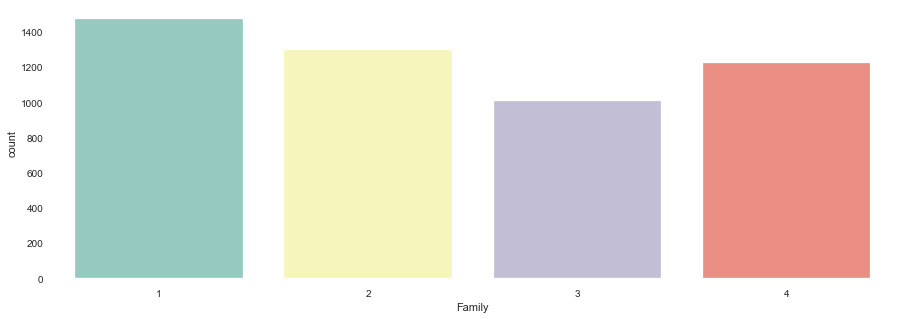

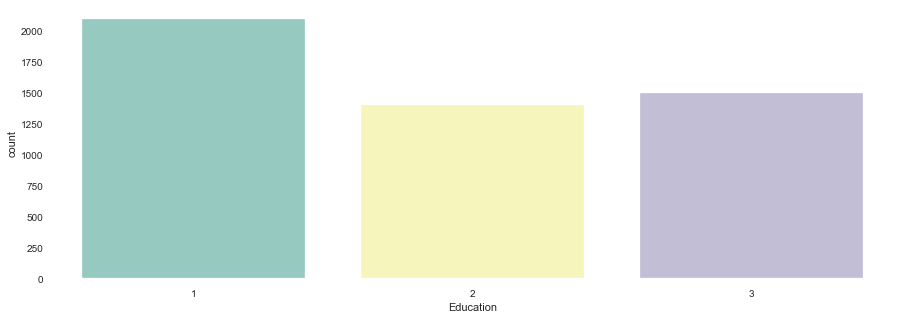

In [140]:
cols = ['Family', 'Education']

for col in cols: 
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 5)
  sns.countplot(df[col], palette="Set3")

**Observation**

* In this dataset, most people are single (1 in the family), followed by 2 people in the family, followed by 4, them 3.
* In this datset, most people completed at least an Undergrad degree, followed by a Advanced/Professional degree and the remaining obtained their a Masters.


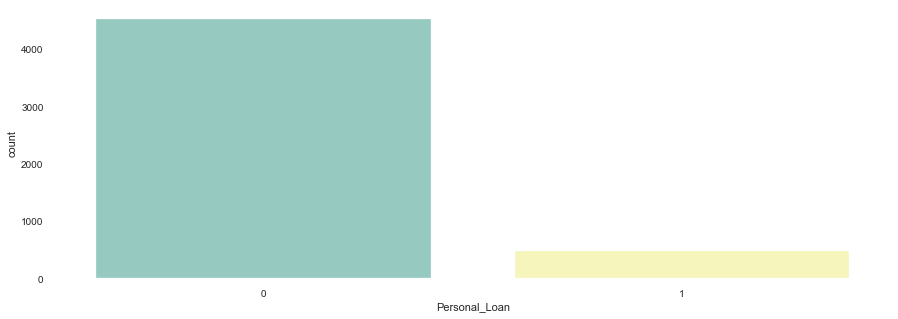

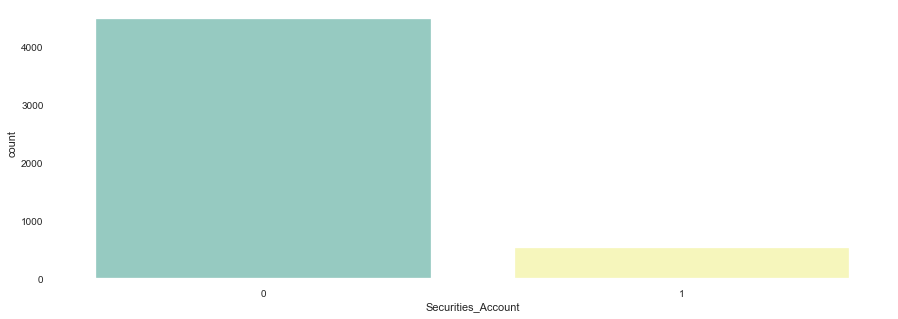

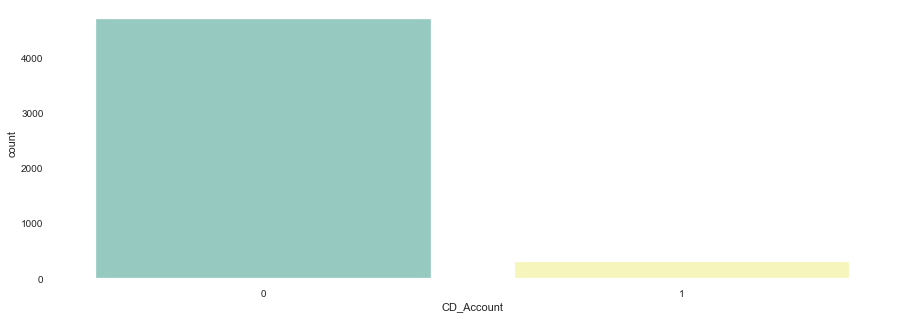

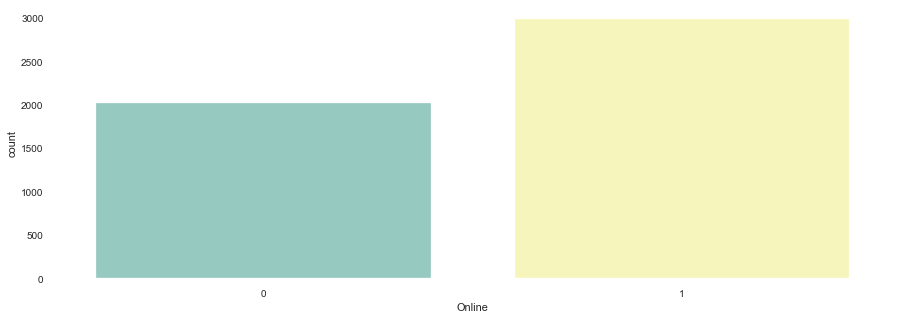

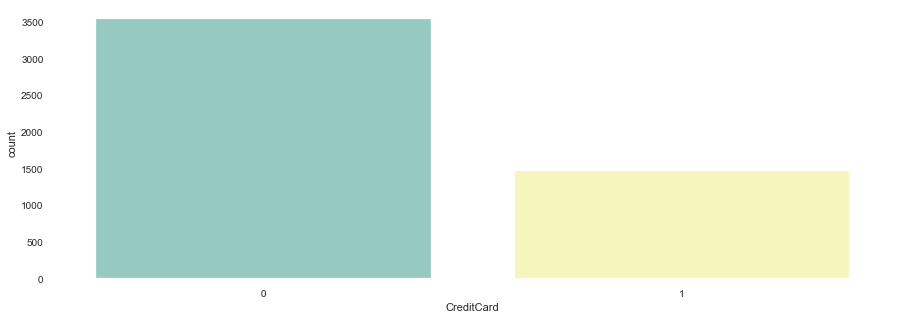

In [141]:
cols = ['Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard']

for col in cols: 
  fig, ax = plt.subplots()
  fig.set_size_inches(15, 5)
  sns.countplot(df[col], palette="Set3")

**Observation**

* To get a better understanding of this dataset we need to understand that 0 = False and 1= True.
* We observe that a higher number of people in this dataset do not have CreditCard, CD_Account and a Securities_Account

In [142]:
#Using this fuction below to generate a Profile Report
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

#This alllow allows us to get a summary of the data we are working with, get a better understanding and complete EDA requirement.

**Multivariate Analysis**

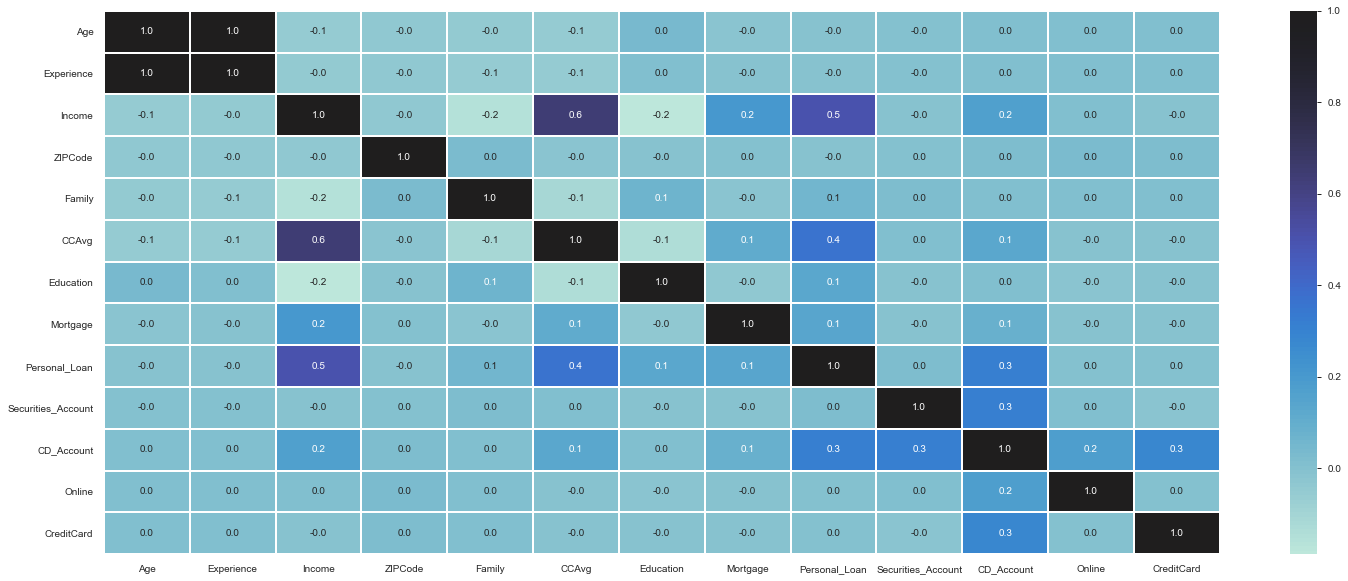

In [143]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.01f', center = 1 )  # heatmap
plt.show()
#The heatmap below is an example of Multivariate Analysis

**Observation**
* We can see that Age and Experience are positively highly correlated
* We can see that Income and CCAvg are also positively correlated
* We can see that Income and Personal_low_Securities account are fairly positively correlated as well
* Personal_Loan has the highest correlation with the Income with the value of 0.5. Our dependent variable will be   Personal_Loan

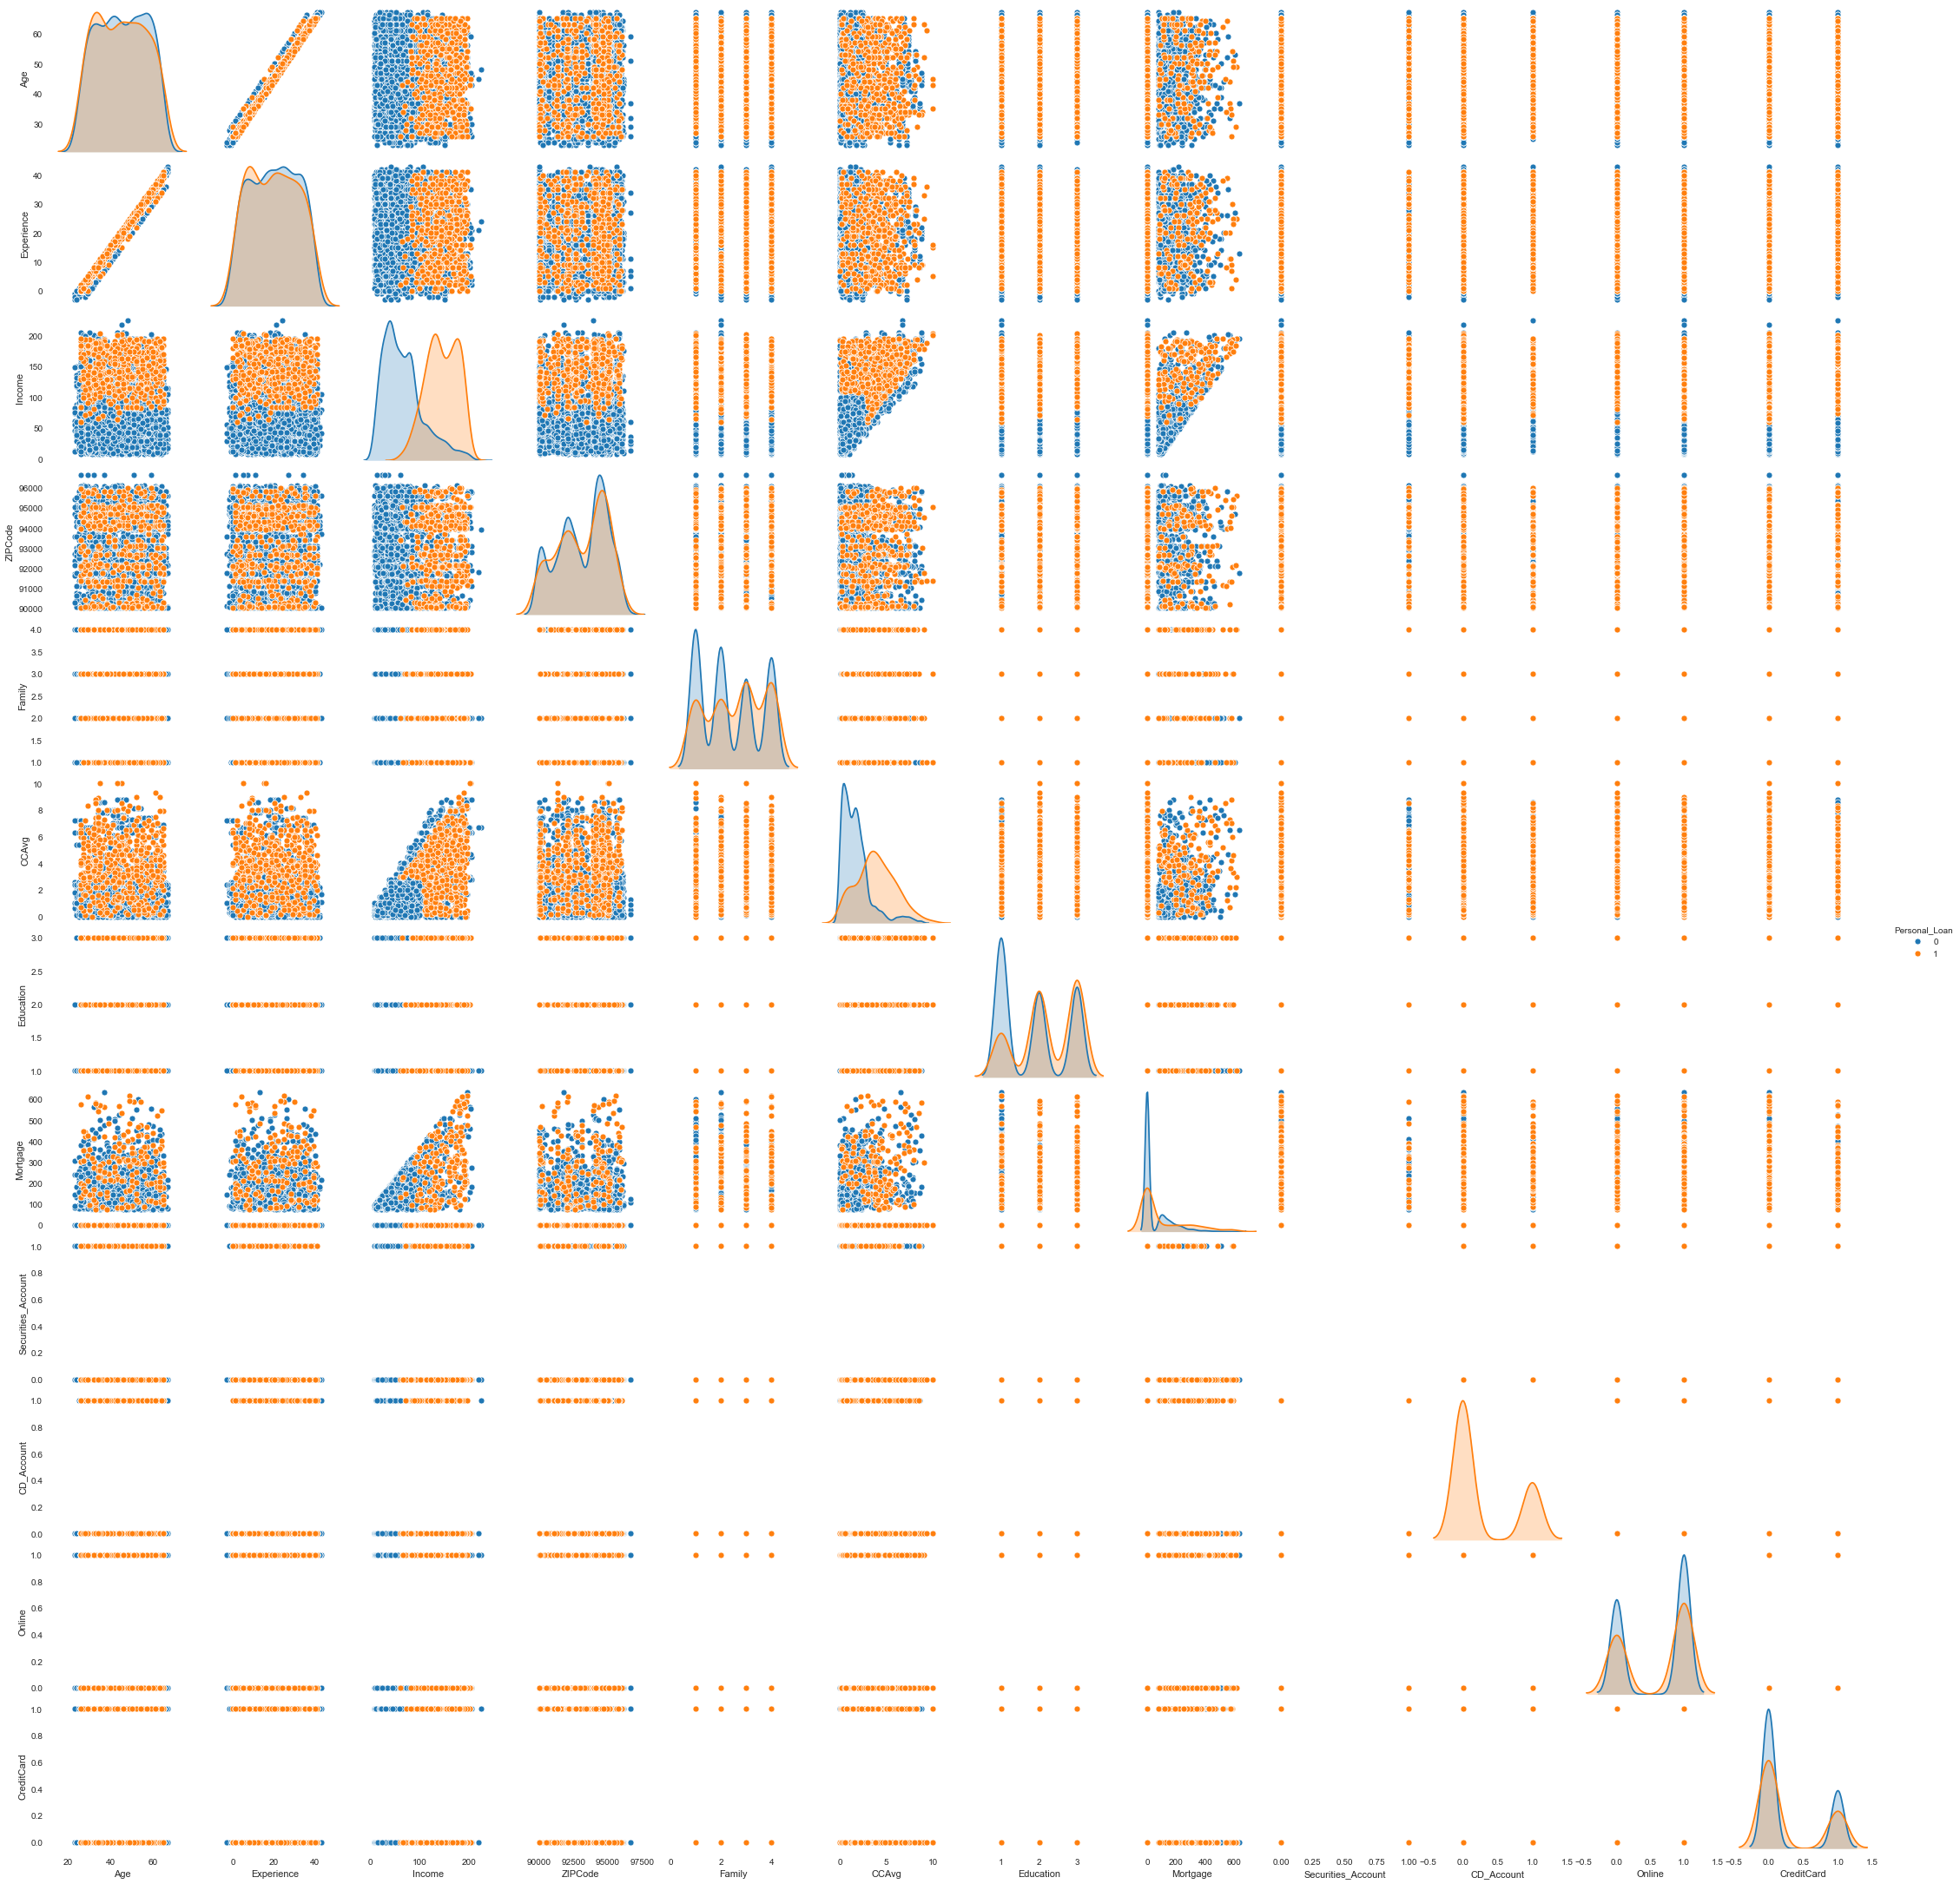

In [144]:
#sns.pairplot(df)
sns.pairplot(data=df,hue="Personal_Loan",)
plt.show()

Text(0.5, 0, 'Personal_Loan')

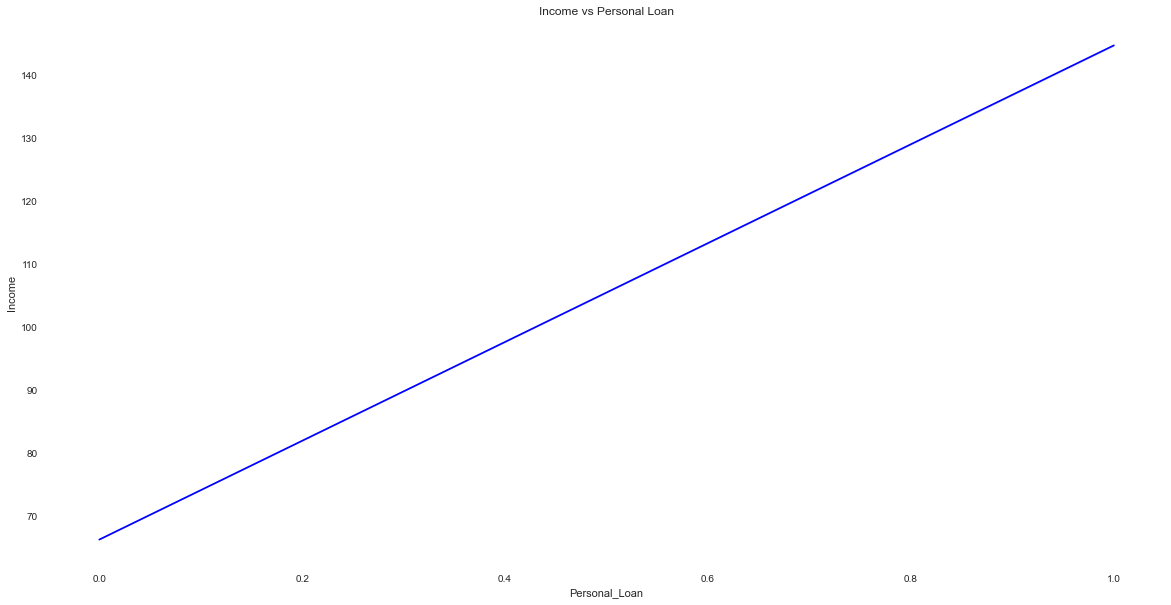

In [145]:
plt.figure(figsize=(20,10)) #Adjusting plot width to 20 and height to 10

sns.lineplot(y="Income", x="Personal_Loan",data=df,ci=0,color="BLUE")

plt.title('Income vs Personal Loan')                 #Plot title
plt.ylabel('Income')                           #Label (name) for Y axis
plt.xlabel('Personal_Loan')                         #Label (name) for X axis
#The graph below is an example of Multivariate Analysis

**Obersation**
* As suspected, we can see that the income increases, so does the fact that the accepted the last campaign loan offer

Text(0.5, 0, 'CCAvg')

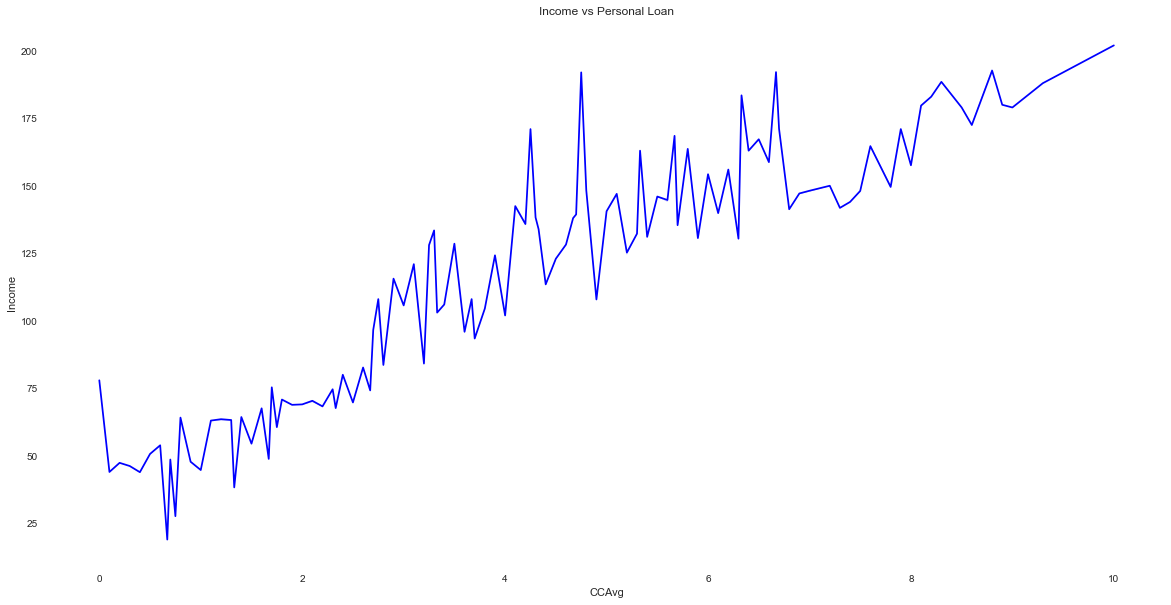

In [146]:
plt.figure(figsize=(20,10)) #Adjusting plot width to 20 and height to 10

#Plotting Line Plot to show Product vs Usage sorted by Years of Fitness level
sns.lineplot(y="Income", x="CCAvg",data=df,ci=0,color="BLUE")

plt.title('Income vs Personal Loan')                 #Plot title
plt.ylabel('Income')                           #Label (name) for Y axis
plt.xlabel('CCAvg')                         #Label (name) for X axis
#The graph below is an example of Multivariate Analysis

**Observation**

* As supected, the higher the income, the higher the person spends. 
* However, we can also see that this data fluctuates which may the results of higher reponsablities by users such as more family member, debt... 

**Data preprocessing**

**Balancing Data set**

In [147]:
# Class count
count_class_0, count_class_1 = df["Personal_Loan"].value_counts()

# Divide by class
df_class_0 = df[df["Personal_Loan"] == 0]
df_class_1 = df[df["Personal_Loan"] == 1]

In [148]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
final_df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(final_df["Personal_Loan"].value_counts())

Random over-sampling:
1    4520
0    4520
Name: Personal_Loan, dtype: int64


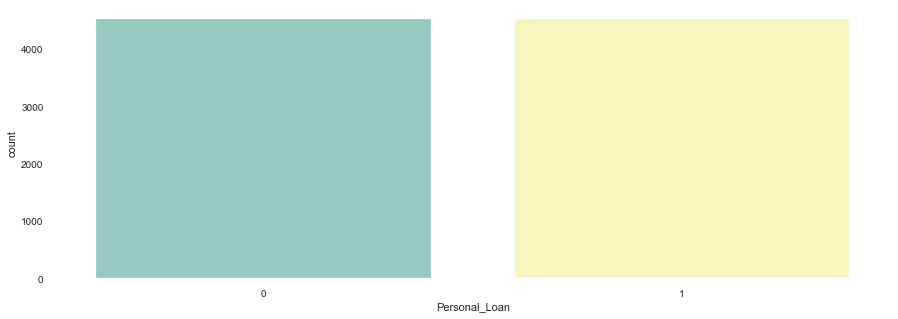

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(final_df["Personal_Loan"], palette="Set3")

**Preparing X and Y using Pandas**

In [150]:
X= final_df.drop("Personal_Loan", axis=1)

y = final_df["Personal_Loan"]

X_col = X.columns

**Standarization**

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = X_col

In [152]:
X.head()

Age  Experience    Income   ZIPCode    Family     CCAvg  Education  \
0 -1.753256   -1.648537 -1.056680 -1.178240  1.318469 -0.571610  -1.262356   
1 -0.013462   -0.080337 -1.335720 -1.758270  0.438711 -0.617736  -1.262356   
2 -0.535400   -0.428826 -1.763580  0.880353 -1.320804 -0.848366  -1.262356   
3 -0.883359   -0.951559 -0.107945  0.533931 -1.320804 -0.064224  -0.042115   
4 -0.883359   -1.038682 -1.131090 -1.051181  1.318469 -0.848366  -0.042115   

   Mortgage  Securities_Account  CD_Account    Online  CreditCard  
0 -0.582443            2.794802   -0.449408 -1.232114   -0.646560  
1 -0.582443            2.794802   -0.449408 -1.232114   -0.646560  
2 -0.582443           -0.357807   -0.449408 -1.232114   -0.646560  
3 -0.582443           -0.357807   -0.449408 -1.232114   -0.646560  
4 -0.582443           -0.357807   -0.449408 -1.232114    1.546648

**Splitting Data into train and test sample:**

In [153]:
# Splitting data into train and test sample using 70% data for training and 30% data for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

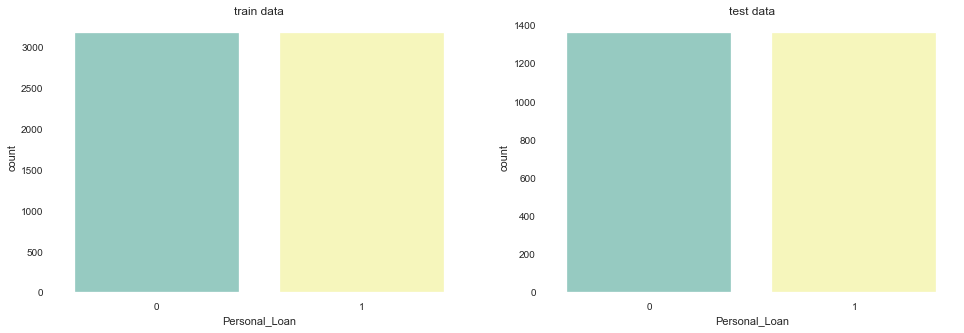

In [154]:
# count of training and validation class

plt.figure(1 , figsize = (25 ,5))
n = 0 
for z , j in zip([y_train , y_test] , ['train data', 'test data']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z, palette="Set3" )
    plt.title(j)
plt.show()

In [155]:
print('The Train data shape {}. \nThe Test data shape {}.'.format(X_train.shape, X_test.shape))

The Train data shape (6328, 12). 
The Test data shape (2712, 12).


**Model building**

**Logistic Regression**

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [157]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
predictions= clf1.predict(X_test)

train_acc1 = clf1.score(X_train, y_train)*100
test_acc1 = clf1.score(X_test, y_test)*100

print("Accuracy on training set: {:.3f}%. \n".format(train_acc1))
print("Accuracy on test set: {:.3f}%. \n".format(test_acc1))

#Logistic Regression Classification Report
print("Classification Report: \n",classification_report(y_test, predictions)) 
print()

#Logistic Regression Confusion matrix
print("Confusion Report:\n", confusion_matrix(y_test,predictions))

Accuracy on training set: 90.202%. 

Accuracy on test set: 89.049%. 

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1356
           1       0.89      0.89      0.89      1356

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712


Confusion Report:
 [[1212  144]
 [ 153 1203]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.890


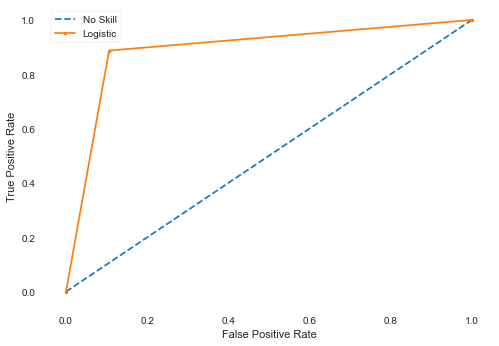

In [158]:
# calculate scores (Model performance evaluation and improvement)
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Grid Search on Logistic Regression (Model Performance)**

In [159]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
clf2 = GridSearchCV(clf1, param_grid = grid_values,scoring = 'recall')
clf2.fit(X_train, y_train)

best_parameters = clf2.best_params_
print("Best parameters of the model are:\n {} ".format(best_parameters))

predictions= clf2.predict(X_test)

train_acc2 = clf2.score(X_train, y_train)*100
test_acc2 = clf2.score(X_test, y_test)*100
print()
print("Accuracy on training set: {:.3f}%. \n".format(train_acc2))
print("Accuracy on test set: {:.3f}%. \n".format(test_acc2))

#Logistic Regression (Grid Search) Classification Report
print("Classification Report: \n",classification_report(y_test, predictions)) 
print()

#Logistic Regression (Grid Search) Confusion matrix
print("Confusion Report:\n",confusion_matrix(y_test,predictions))

Best parameters of the model are:
 {'C': 5, 'penalty': 'l2'} 

Accuracy on training set: 90.645%. 

Accuracy on test set: 88.791%. 

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1356
           1       0.89      0.89      0.89      1356

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712


Confusion Report:
 [[1213  143]
 [ 152 1204]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.891


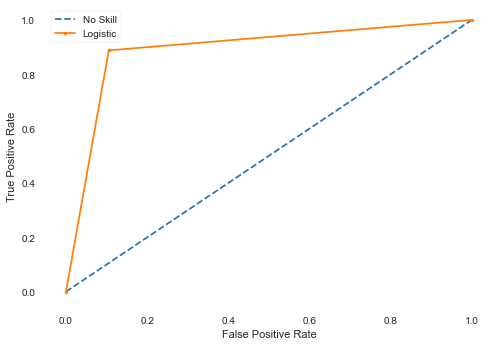

In [160]:
# calculate scores
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Decision Tree**

In [161]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier().fit(X_train,y_train)

predictions= clf3.predict(X_test)

train_acc3 = clf3.score(X_train, y_train)*100
test_acc3 = clf3.score(X_test, y_test)*100
print()
print("Accuracy on training set: {:.3f}%. \n".format(train_acc3))
print("Accuracy on test set: {:.3f}%. \n".format(test_acc3))

#Decision Tree Classification Report
print("Classification Report: \n",classification_report(y_test, predictions)) 
print()

#Decision Tree Confusion matrix
print("Confusion Report:\n",confusion_matrix(y_test,predictions))


Accuracy on training set: 100.000%. 

Accuracy on test set: 99.631%. 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1356
           1       0.99      1.00      1.00      1356

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712


Confusion Report:
 [[1346   10]
 [   0 1356]]


No Skill: ROC AUC=0.500
Desicion Tree: ROC AUC=0.996


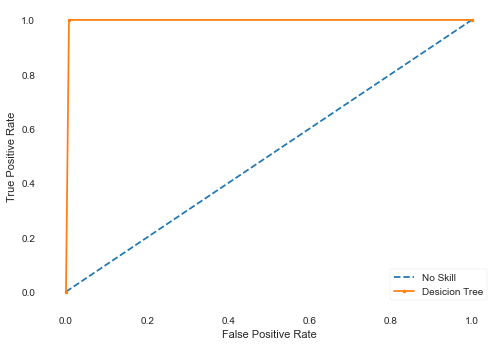

In [162]:
# calculate scores
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Desicion Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Desicion Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Grid Search on Decision Tree (Model Performance)**

In [163]:
grid_param = { 'min_samples_leaf':[5, 10, 15, 20], 'max_depth':[5, 10, 15, 20], 
              'criterion': ['gini', 'entropy'] }
clf4 = GridSearchCV(estimator=clf3, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
clf4.fit(X_train, y_train)
best_parameters = clf4.best_params_
print("Best parameters of the model are:\n {} ".format(best_parameters))

predictions= clf4.predict(X_test)

train_acc4 = clf4.score(X_train, y_train)*100
test_acc4 = clf4.score(X_test, y_test)*100
print()
print("Accuracy on training set: {:.3f}%. \n".format(train_acc4))
print("Accuracy on test set: {:.3f}%. \n".format(test_acc4))

#Decision Tree (Grid Search) Classification Report
print("Classification Report: \n",classification_report(y_test, predictions)) 
print()

#Decision Tree (Grid Search) Confusion matrix
print("Confusion Report:\n",confusion_matrix(y_test,predictions))

Best parameters of the model are:
 {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5} 

Accuracy on training set: 99.605%. 

Accuracy on test set: 99.041%. 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1356

    accuracy                           0.99      2712
   macro avg       0.99      0.99      0.99      2712
weighted avg       0.99      0.99      0.99      2712


Confusion Report:
 [[1341   15]
 [  11 1345]]


No Skill: ROC AUC=0.500
Desicion Tree: ROC AUC=0.990


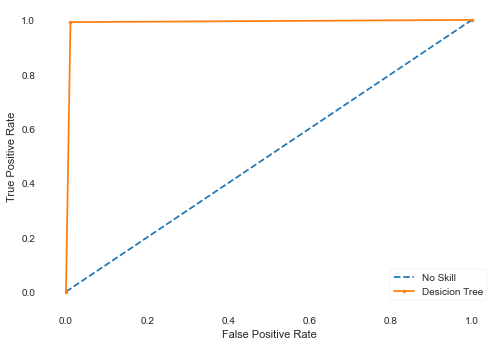

In [164]:
# calculate scores
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Desicion Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Desicion Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

**Comparing Decision Tree and Logistic Regression**

In [165]:
comp = {"Algorithm": ["Logistic Regression", "Grid Search Logistic Regression", "Decision Tree", "Grid Search Decision Tree"],
         "Test Score":[test_acc1, test_acc2, test_acc3, test_acc4],
        "Train Score":[train_acc1, train_acc2, train_acc3, train_acc4],
        "Model":[clf1, clf2,clf3, clf4]}

comparision = pd.DataFrame(comp)

comparision

Algorithm  Test Score  Train Score  \
0              Logistic Regression   89.048673    90.202276   
1  Grid Search Logistic Regression   88.790560    90.644753   
2                    Decision Tree   99.631268   100.000000   
3        Grid Search Decision Tree   99.041298    99.604930   

                                               Model  
0                               LogisticRegression()  
1  GridSearchCV(estimator=LogisticRegression(),\n...  
2                           DecisionTreeClassifier()  
3  GridSearchCV(cv=5, estimator=DecisionTreeClass...

In [166]:
print("Best Performing Algorithm:",comparision.loc[comparision["Test Score"].idxmax(), 'Algorithm'])
print()
print("Best Test Score: ",comparision.loc[comparision["Test Score"].idxmax(), 'Test Score'])
print()
print("Best Train Score: ",comparision.loc[comparision["Test Score"].idxmax(), 'Train Score'])

Best Performing Algorithm: Decision Tree

Best Test Score:  99.63126843657817

Best Train Score:  100.0


**Actionable Insights & Recommendations**

* We Analyzed  Personal loan campaign using different techniques and used Decision Tree Classifer to build a model
* We used 2 different Algorithm to test and train our data to determine the best performing algorithm which was the Decision tree with a 99% test score and a 100% train score.
* We also used gridsearch to evaluate model performance
* Predication of a liability customer who will buy a personal loan or not is based on best performing classifer

According to the decision tree model - 
a) We observe that the higher someone income is the higher there chances are to accept a personal loan offer, so I will recommend that the Market team targets people with a higher income.
b) We also notice that the higher the level of education, the higher the income. Although most people completed at least an Undergrad degree. 
c) We also notice that experience plays a major role in the Income so I will recommend targetting people with higher years of experience as it may show that they are more stable in current position.
d) One thing that can also be done to will be to introduce a program - "Build Your Dream with a personal Loan" which will have as goal to educate the clients on the benefits of taking a personal loan and how it can be used.

